In [ ]:
!pip install gputil


  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=dbfbc77b054da9c4ac582a0c15ebb394aefb1dd99c8c54f21c60a80e39ca4115
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import InputLayer, BatchNormalization,Activation, MaxPool2D
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception

import tqdm
import keras
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)

Num GPUs Available:  1


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Dataset/test/Demented'

In [ ]:
len(os.listdir(path))

641

In [ ]:
image_files=[]

In [ ]:
import os
import shutil

# Define your dataset directory
dataset_dir = path
image_files=[]
# Create the new 'Demented' and 'Non_Demented' directories
os.makedirs(os.path.join(dataset_dir, 'Demented'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'Non_Demented'), exist_ok=True)

# Define the class mappings
class_mappings = {
    'Mild_Demented': 'Demented',
    'Moderate_Demented': 'Demented',
    'Very_Mild_Demented': 'Demented'
}

# # Move images to the new 'Demented' and 'Non_Demented' directories
for class_name, target_class in class_mappings.items():
    class_dir = os.path.join(dataset_dir, class_name)
    print(len(os.listdir(class_dir)))
    image_files += os.listdir(class_dir)

    for file in image_files:
        # print(class_dir,file)
        src = os.path.join(class_dir, file)
        dest = os.path.join(dataset_dir, target_class, file)
        shutil.move(src, dest)


0
0
1792


In [ ]:
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    print(os.path.join(dirname, filename))


In [ ]:
batch_size=60
img_size=(224,224)

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0)

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set your Kaggle API credentials (replace with your own values)
os.environ['KAGGLE_USERNAME'] = "owaisbashir26"
os.environ['KAGGLE_KEY'] = "2a10d539f059ebaeee13116cbba05211"

# Navigate to your Google Drive
%cd /content/drive/MyDrive/

# # Replace with the actual dataset URL
dataset_url = "https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images"
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

# # Unzip the downloaded file (adjust the filename as needed)
!unzip -q alzheimers-dataset-4-class-of-images.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
os.listdir('/content/drive/MyDrive/Alzheimer_s Dataset')

['test', 'train']

In [ ]:
from PIL import Image

# Open an image file
image_path = '/content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg'  # Replace this with your image file path
image = Image.open(image_path)

In [ ]:
image.size

(176, 208)

In [ ]:
batch_size=60
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0)
train_data = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 subset="training",
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2)
validation_data= image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/test',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')


submission = image_generator.flow_from_directory(
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=img_size,
                                                 class_mode=None)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


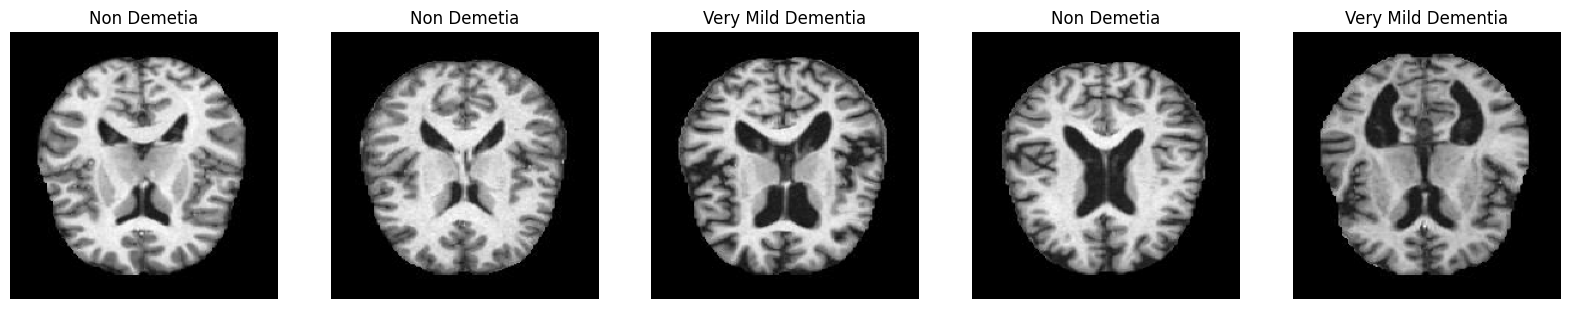

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in range(5):
    rand1 = np.random.randint(len(train_data))
    rand2 = np.random.randint(60)
    ax[i].imshow(train_data[rand1][0][rand2])
    ax[i].axis('off')
    a = train_data[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [ ]:
#same for every model
batch_size=60
epoch=35
callback= keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
vgg19 = VGG19(input_shape=(224, 224, 3), weights="imagenet", include_top=False)


for layer in vgg19.layers:
    layer.trainable = False


x = Flatten()(vgg19.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg19 = Model(inputs=vgg19.input, outputs=out)

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

#compiling
modelvgg19.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelvgg19.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
hist_vgg19=modelvgg19.fit(train_data, epochs=20, validation_data=validation_data, callbacks=callback)

Epoch 1/20
86/86 [==============================] - 2602s 30s/step - loss: 1.2398 - accuracy: 0.5817 - val_loss: 1.1507 - val_accuracy: 0.4887
Epoch 2/20
86/86 [==============================] - 34s 392ms/step - loss: 0.6721 - accuracy: 0.7178 - val_loss: 0.9677 - val_accuracy: 0.5934
Epoch 3/20
86/86 [==============================] - 32s 370ms/step - loss: 0.5828 - accuracy: 0.7491 - val_loss: 0.8303 - val_accuracy: 0.6278
Epoch 4/20
86/86 [==============================] - 33s 379ms/step - loss: 0.4372 - accuracy: 0.8258 - val_loss: 0.7182 - val_accuracy: 0.6755
Epoch 5/20
86/86 [==============================] - 33s 379ms/step - loss: 0.3571 - accuracy: 0.8680 - val_loss: 0.7544 - val_accuracy: 0.6755
Epoch 6/20
86/86 [==============================] - 33s 378ms/step - loss: 0.3149 - accuracy: 0.8867 - val_loss: 0.7460 - val_accuracy: 0.6755
Epoch 7/20
86/86 [==============================] - 33s 379ms/step - loss: 0.2286 - accuracy: 0.9285 - val_loss: 0.8603 - val_accuracy: 0.6489

In [ ]:
vgg16 = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)


for layer in vgg16.layers:
    layer.trainable = False


x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg16 = Model(inputs=vgg16.input, outputs=out)

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

#compiling
modelvgg16.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelvgg16.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
modelvgg16.save_weights('/content/drive/My Drive/model_weights.h5')

In [ ]:
hist_vgg16=modelvgg16.fit(train_data, epochs=20, validation_data=validation_data, callbacks=callback)

Epoch 1/20
86/86 [==============================] - 2525s 29s/step - loss: 1.1987 - accuracy: 0.5589 - val_loss: 0.8432 - val_accuracy: 0.6224
Epoch 2/20
86/86 [==============================] - 17s 197ms/step - loss: 0.6665 - accuracy: 0.7200 - val_loss: 0.8402 - val_accuracy: 0.6302
Epoch 3/20
86/86 [==============================] - 17s 197ms/step - loss: 0.5864 - accuracy: 0.7665 - val_loss: 1.0686 - val_accuracy: 0.6067
Epoch 4/20
86/86 [==============================] - 17s 198ms/step - loss: 0.4512 - accuracy: 0.8356 - val_loss: 0.7736 - val_accuracy: 0.6677
Epoch 5/20
86/86 [==============================] - 17s 198ms/step - loss: 0.3539 - accuracy: 0.8875 - val_loss: 0.7296 - val_accuracy: 0.6810
Epoch 6/20
86/86 [==============================] - 17s 195ms/step - loss: 0.3117 - accuracy: 0.8994 - val_loss: 0.7690 - val_accuracy: 0.6779
Epoch 7/20
86/86 [==============================] - 17s 193ms/step - loss: 0.2235 - accuracy: 0.9424 - val_loss: 0.7841 - val_accuracy: 0.6873

In [ ]:
loss_vgg16,accuracy_vgg16 = modelvgg16.evaluate(validation_data)

22/22 [==============================] - 3s 151ms/step - loss: 0.7296 - accuracy: 0.6810


In [ ]:
batch_size=60
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)
train_data = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 subset="training",
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2)
validation_data= image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')


submission = image_generator.flow_from_directory(
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=img_size,
                                                 class_mode=None)

MobileNet

In [ ]:
mobilenet = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = False
x = Flatten()(mobilenet.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelmnet= Model(inputs=mobilenet.input, outputs=out)

#Compiling
modelmnet.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelmnet.summary()


17225924/17225924 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                              

In [ ]:
#same for every model
batch_size=60
epoch=35
callback= keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
hist_mnet=modelmnet.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 3042s 35s/step - loss: 5.6018 - accuracy: 0.6247 - val_loss: 2.1378 - val_accuracy: 0.6685
Epoch 2/35
86/86 [==============================] - 14s 168ms/step - loss: 0.3700 - accuracy: 0.8889 - val_loss: 2.0947 - val_accuracy: 0.6654
Epoch 3/35
86/86 [==============================] - 14s 166ms/step - loss: 0.1246 - accuracy: 0.9553 - val_loss: 2.0867 - val_accuracy: 0.6482
Epoch 4/35
86/86 [==============================] - 15s 171ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 2.2206 - val_accuracy: 0.6708
Epoch 5/35
86/86 [==============================] - 15s 171ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 1.8896 - val_accuracy: 0.6794
Epoch 6/35
86/86 [==============================] - 15s 170ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.8450 - val_accuracy: 0.6896
Epoch 7/35
86/86 [==============================] - 15s 170ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8048 - val_accuracy: 0.6873

In [ ]:
loss_mnet,accuracy_mnet= modelmnet.evaluate(validation_data)

22/22 [==============================] - 3s 131ms/step - loss: 1.8048 - accuracy: 0.6873


In [ ]:
batch_size=60
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0)
train_data = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 subset="training",
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2)
validation_data= image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/test',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')


submission = image_generator.flow_from_directory(
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=img_size,
                                                 class_mode=None)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


In [ ]:
mobilenet2 = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in mobilenet2.layers:
    layer.trainable = False
x = Flatten()(mobilenet2.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelmnet2= Model(inputs=mobilenet2.input, outputs=out)

#Compiling
modelmnet2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelmnet2.summary()


In [ ]:
hist_mnet2=modelmnet2.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 18s 178ms/step - loss: 4.4173 - accuracy: 0.6026 - val_loss: 1.1695 - val_accuracy: 0.6466
Epoch 2/35
86/86 [==============================] - 14s 159ms/step - loss: 0.2327 - accuracy: 0.9174 - val_loss: 1.0621 - val_accuracy: 0.6779
Epoch 3/35
86/86 [==============================] - 13s 158ms/step - loss: 0.0723 - accuracy: 0.9834 - val_loss: 1.2582 - val_accuracy: 0.6685
Epoch 4/35
86/86 [==============================] - 13s 156ms/step - loss: 0.0325 - accuracy: 0.9975 - val_loss: 1.1496 - val_accuracy: 0.6810
Epoch 5/35
86/86 [==============================] - 14s 160ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.0982 - val_accuracy: 0.6959
Epoch 6/35
86/86 [==============================] - 14s 158ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 1.0794 - val_accuracy: 0.7037
Epoch 7/35
86/86 [==============================] - 13s 155ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.1363 - val_accuracy: 0.6974

In [ ]:
loss_mnet,accuracy_mnet= modelmnet2.evaluate(validation_data)

22/22 [==============================] - 3s 130ms/step - loss: 1.0622 - accuracy: 0.6779


In [ ]:
accuracy_mnet

0.6778733134269714

In [ ]:
vgg16 = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)


for layer in vgg16.layers:
    layer.trainable = False


x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg16 = Model(inputs=vgg16.input, outputs=out)

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

#compiling
modelvgg16.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelvgg16.summary()

In [ ]:
hist_vgg16=modelvgg16.fit(train_data, epochs=20, validation_data=validation_data, callbacks=callback)

Epoch 1/20
86/86 [==============================] - 18s 179ms/step - loss: 1.2266 - accuracy: 0.5640 - val_loss: 0.9646 - val_accuracy: 0.5536
Epoch 2/20
86/86 [==============================] - 14s 165ms/step - loss: 0.7040 - accuracy: 0.6880 - val_loss: 0.8588 - val_accuracy: 0.6349
Epoch 3/20
86/86 [==============================] - 14s 162ms/step - loss: 0.5111 - accuracy: 0.8090 - val_loss: 0.8010 - val_accuracy: 0.6536
Epoch 4/20
86/86 [==============================] - 14s 164ms/step - loss: 0.4132 - accuracy: 0.8524 - val_loss: 0.8259 - val_accuracy: 0.6411
Epoch 5/20
86/86 [==============================] - 15s 173ms/step - loss: 0.3323 - accuracy: 0.8922 - val_loss: 0.7724 - val_accuracy: 0.6724
Epoch 6/20
86/86 [==============================] - 14s 166ms/step - loss: 0.2571 - accuracy: 0.9311 - val_loss: 0.9899 - val_accuracy: 0.6458
Epoch 7/20
86/86 [==============================] - 15s 169ms/step - loss: 0.2254 - accuracy: 0.9336 - val_loss: 1.1966 - val_accuracy: 0.6200

In [ ]:
loss_mnet,accuracy_mnet= modelvgg16.evaluate(validation_data)

22/22 [==============================] - 3s 134ms/step - loss: 0.7724 - accuracy: 0.6724


resnet 50

In [ ]:
rn50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in rn50.layers:
    layer.trainable = False
x = Flatten()(rn50.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelrn50= Model(inputs=rn50.input, outputs=out)

#compiling
modelrn50.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelrn50.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [ ]:
hist_rn50=modelrn50.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 20s 188ms/step - loss: 2.5665 - accuracy: 0.4380 - val_loss: 1.2787 - val_accuracy: 0.3925
Epoch 2/35
86/86 [==============================] - 14s 166ms/step - loss: 1.2776 - accuracy: 0.5263 - val_loss: 2.0861 - val_accuracy: 0.5035
Epoch 3/35
86/86 [==============================] - 15s 169ms/step - loss: 1.0090 - accuracy: 0.5651 - val_loss: 1.1585 - val_accuracy: 0.5262
Epoch 4/35
86/86 [==============================] - 15s 169ms/step - loss: 1.0293 - accuracy: 0.5714 - val_loss: 1.1387 - val_accuracy: 0.5137
Epoch 5/35
86/86 [==============================] - 14s 165ms/step - loss: 1.0631 - accuracy: 0.5823 - val_loss: 1.1357 - val_accuracy: 0.4996
Epoch 6/35
86/86 [==============================] - 15s 173ms/step - loss: 0.9924 - accuracy: 0.5962 - val_loss: 0.9622 - val_accuracy: 0.5668
Epoch 7/35
86/86 [==============================] - 14s 168ms/step - loss: 0.7867 - accuracy: 0.6526 - val_loss: 1.0403 - val_accuracy: 0.5145

In [ ]:
loss_mnet,accuracy_mnet= modelrn50.evaluate(validation_data)

22/22 [==============================] - 3s 132ms/step - loss: 0.8610 - accuracy: 0.6333


In [ ]:
accuracy_mnet

0.6333072781562805

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Define input shape
input_shape = (224, 224, 3)
num_classes = 4  # Replace with the number of classes in your dataset

# Load the pre-trained EfficientNetB0 model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers
for layer in efficientnet_model.layers:
    layer.trainable = False

# Add custom layers for your specific task
x = GlobalAveragePooling2D()(efficientnet_model.output)
x = Dense(128, activation='relu')(x)  # Add more layers as needed
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
model_efficientnet = Model(inputs=efficientnet_model.input, outputs=output)

# Compile the model
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model_efficientnet.summary()


In [ ]:
hist_rn50=model_efficientnet.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 23s 189ms/step - loss: 1.0623 - accuracy: 0.4638 - val_loss: 1.0441 - val_accuracy: 0.5004
Epoch 2/35
86/86 [==============================] - 15s 172ms/step - loss: 1.0413 - accuracy: 0.4927 - val_loss: 1.0376 - val_accuracy: 0.5004
Epoch 3/35
86/86 [==============================] - 14s 162ms/step - loss: 1.0482 - accuracy: 0.4894 - val_loss: 1.0465 - val_accuracy: 0.5004
Epoch 4/35
86/86 [==============================] - 15s 172ms/step - loss: 1.0467 - accuracy: 0.4884 - val_loss: 1.0446 - val_accuracy: 0.5004
Epoch 5/35
86/86 [==============================] - 15s 169ms/step - loss: 1.0458 - accuracy: 0.4954 - val_loss: 1.0327 - val_accuracy: 0.5004
Epoch 6/35
86/86 [==============================] - 15s 170ms/step - loss: 1.0447 - accuracy: 0.4997 - val_loss: 1.0349 - val_accuracy: 0.5004
Epoch 7/35
86/86 [==============================] - 14s 168ms/step - loss: 1.0433 - accuracy: 0.4952 - val_loss: 1.0393 - val_accuracy: 0.5004

In [ ]:
loss_mnet,accuracy_mnet= model_efficientnet.evaluate(validation_data)

22/22 [==============================] - 3s 134ms/step - loss: 1.0326 - accuracy: 0.5004


efficientnet

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

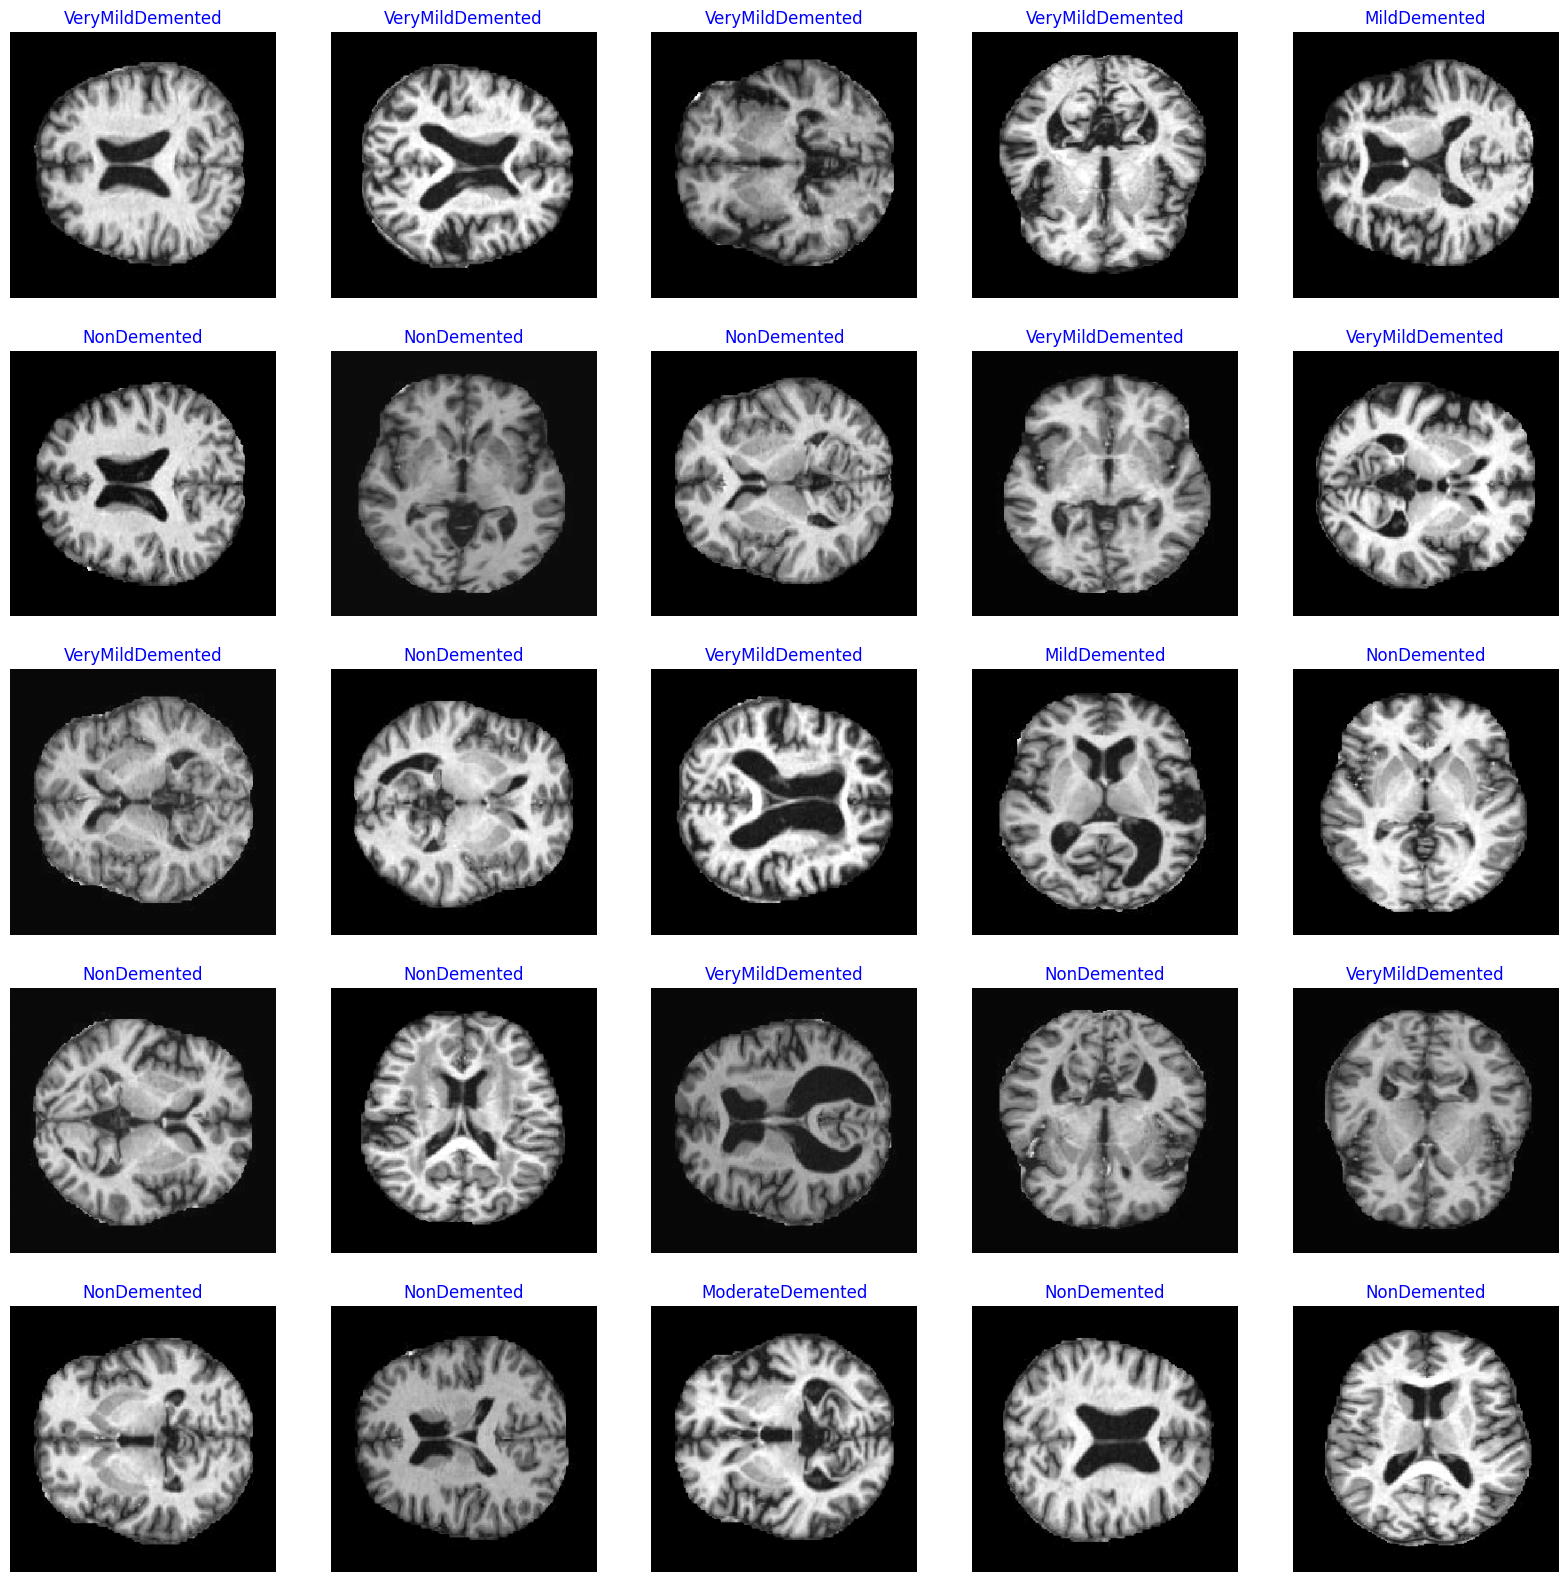

In [ ]:
show_images(train_gen)

In [ ]:
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer
# tf.random.set_seed(123)
# np.random.seed(123)

# Create the pre-trained ConvNeXtTiny base model
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max',
)

43941136/43941136 [==============================] - 3s 0us/step


In [ ]:
model = Sequential([
    base_model,
    Dense(class_count, activation='softmax')
])

In [ ]:
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense (Dense)               (None, 4)                 6148      
                                                                 
Total params: 10789683 (41.16 MB)
Trainable params: 10702380 (40.83 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________
